In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
#import data
players=pd.read_csv('res/Players.csv', dtype='unicode')
Seasons=pd.read_csv('res/Seasons_Stats.csv', dtype='unicode')
#clean data
players['college'] = players['collage']
players.drop('collage', axis=1, inplace=True)
players.drop('Unnamed: 0', axis=1, inplace=True)
Seasons=Seasons[Seasons['Player'] !=0]
Seasons['Age'] = Seasons['Age'].apply(pd.to_numeric)
Seasons.drop('Unnamed: 0', axis=1,inplace=True)
Seasons[['PTS','STL','AST','ORB','DRB','BLK','G','TRB','WS','PER','BPM','VORP']] = Seasons[['PTS','STL','AST','ORB','DRB','BLK','G','TRB','WS','PER','BPM','VORP']].apply(pd.to_numeric)
Seasons = Seasons.rename(index=str, columns={"PTS": "points", "Pos": "position", "Tm": "team", "G": "games", "GS": "games_started",
                                        "MP": "minutes_played", "BLK": "blocks", "TOV": "turnovers", "PF": "personal_fouls",
                                        "AST": "assists", "STL": "steals", "DRB": "defensive_rebounds", "ORB": "offensive_rebounds",
                                  "TRB": "total_rebounds", "WS": "win_shares"})
Seasons.head()
#players.dropna(how='all',inplace=True)
#players.set_index('Player',inplace=True)

,Year,Player,position,Age,team,games,games_started,minutes_played,PER,TS%,...,FT%,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217,458.0
1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99,279.0
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192,438.0
3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29,63.0
4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27,59.0


In [265]:
# fix height and weight
players[['height','weight']] = players[['height','weight']].apply(pd.to_numeric)
players['height'] = players['height'] * 0.0328084 # cm -> ft
players['weight'] = players['weight'] * 2.20462 # kg -> lb

In [266]:
#players['pos'] = players.Player.apply(lambda x: Seasons.Pos[Seasons.Player == x].values[0])
Seasons['height'] = Seasons.Player.apply(lambda x: players.height[players.Player == x].values)
Seasons['weight'] = Seasons.Player.apply(lambda x: players.weight[players.Player == x].values)
Seasons['college'] = Seasons.Player.apply(lambda x: players.college[players.Player == x].values)
Seasons['born'] = Seasons.Player.apply(lambda x: players.born[players.Player == x].values)
Seasons['birth_city'] = Seasons.Player.apply(lambda x: players.birth_city[players.Player == x].values)
Seasons['birth_state'] = Seasons.Player.apply(lambda x: players.birth_state[players.Player == x].values)
Seasons.head()

,Year,Player,position,Age,team,games,games_started,minutes_played,PER,TS%,...,blocks,turnovers,personal_fouls,points,height,weight,college,born,birth_city,birth_state
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,NaN,217,458.0,[5.905512],[169.75574],[Indiana University],[1918],[nan],[nan]
1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,NaN,99,279.0,[6.1679792],[182.98346],[University of Kentucky],[1921],[Yorktown],[Indiana]
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,NaN,NaN,192,438.0,[6.3320212],[189.59732],[University of Notre Dame],[1924],[nan],[nan]
3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,NaN,NaN,29,63.0,[6.4304464],[194.00656],[North Carolina State University],[1925],[nan],[nan]
4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,NaN,NaN,27,59.0,[6.4304464],[194.00656],[North Carolina State University],[1925],[nan],[nan]


In [267]:
Seasons['height'] = Seasons['height'].str.get(0)
Seasons['weight'] = Seasons['weight'].str.get(0)
Seasons['college'] = Seasons['college'].str.get(0)
Seasons['born'] = Seasons['born'].str.get(0)
Seasons['birth_city'] = Seasons['birth_city'].str.get(0)
Seasons['birth_state'] = Seasons['birth_state'].str.get(0)

In [268]:
Seasons['hall_of_fame'] = 0
Seasons.loc[Seasons['Player'].str.contains("\*", na=False), 'hall_of_fame'] = 1
Seasons['hall_of_fame'].apply(pd.to_numeric)
Seasons['Player'] = Seasons['Player'].str.replace("\*", "")

In [269]:
Seasons.columns.values

array(['Year', 'Player', 'position', 'Age', 'team', 'games',
       'games_started', 'minutes_played', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'blanl', 'OWS', 'DWS', 'win_shares', 'WS/48', 'blank2', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'offensive_rebounds',
       'defensive_rebounds', 'total_rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'personal_fouls', 'points', 'height',
       'weight', 'college', 'born', 'birth_city', 'birth_state',
       'hall_of_fame'], dtype=object)

In [270]:
#add columns for per game stats
Seasons['ppg'] = Seasons.points/Seasons.games
Seasons['spg'] = Seasons.steals/Seasons.games
Seasons['apg'] = Seasons.assists/Seasons.games
Seasons['orpg'] = Seasons.offensive_rebounds/Seasons.games
Seasons['drpg'] = Seasons.defensive_rebounds/Seasons.games
Seasons['rpg'] = Seasons.total_rebounds/Seasons.games
Seasons['bpg'] = Seasons['blocks']/Seasons.games

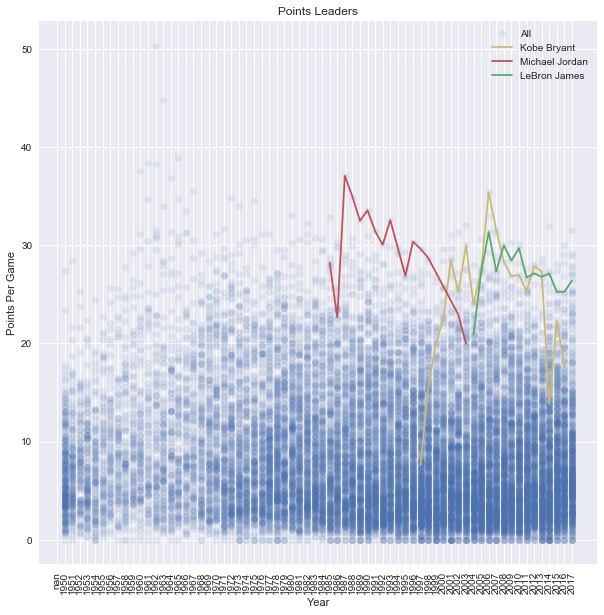

In [271]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Year'],Seasons['ppg'],'o', alpha = 0.1)
plt.plot(Seasons.Year[Seasons.Player == 'Kobe Bryant'],Seasons.ppg[Seasons.Player == 'Kobe Bryant'], color = 'y')
plt.plot(Seasons.Year[Seasons.Player == 'Michael Jordan'],Seasons.ppg[Seasons.Player == 'Michael Jordan'], color = 'r')
plt.plot(Seasons.Year[Seasons.Player == 'LeBron James'],Seasons.ppg[Seasons.Player == 'LeBron James'])
plt.legend(['All','Kobe Bryant','Michael Jordan','LeBron James'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Points Per Game')
plt.title('Points Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

In [272]:
basic_info = Seasons[['Player', 'games', 'points', 'assists', 'total_rebounds', 'blocks', 'steals', 'hall_of_fame',
                     'win_shares', 'PER', 'VORP', 'BPM']]
basic_info.head()

,Player,games,points,assists,total_rebounds,blocks,steals,hall_of_fame,win_shares,PER,VORP,BPM
0,Curly Armstrong,63.0,458.0,176.0,NaN,NaN,NaN,0,3.5,NaN,NaN,NaN
1,Cliff Barker,49.0,279.0,109.0,NaN,NaN,NaN,0,2.2,NaN,NaN,NaN
2,Leo Barnhorst,67.0,438.0,140.0,NaN,NaN,NaN,0,3.6,NaN,NaN,NaN
3,Ed Bartels,15.0,63.0,20.0,NaN,NaN,NaN,0,-0.6,NaN,NaN,NaN
4,Ed Bartels,13.0,59.0,20.0,NaN,NaN,NaN,0,-0.6,NaN,NaN,NaN


In [308]:
career = basic_info.groupby('Player').agg('sum')
career['ppg'] = career.points/career.games
career['spg'] = career.steals/career.games
career['apg'] = career.assists/career.games
career['rpg'] = career.total_rebounds/career.games
career['bpg'] = career['blocks']/career.games
career['PER']

Player
A.C. Green            249.7
A.J. Bramlett          -0.4
A.J. English           23.1
A.J. Guyton            13.1
A.J. Hammons            8.4
A.J. Price             93.5
A.J. Wynder             7.6
A.W. Holt              -1.8
Aaron Brooks          184.9
Aaron Gordon           42.8
Aaron Gray            119.9
Aaron Harrison          2.1
Aaron James            68.5
Aaron McKie           194.6
Aaron Miles             6.0
Aaron Swinson          11.7
Aaron Williams        222.4
Abdul Jeelani          34.2
Acie Earl              69.2
Acie Law              100.1
Adam Harrington        19.2
Adam Keefe            110.2
Adam Morrison          29.7
Adonal Foyle          168.0
Adonis Jordan          24.5
Adonis Thomas          23.2
Adreian Payne          38.4
Adrian Branch          61.8
Adrian Caldwell        54.3
Adrian Dantley        387.1
                      ...  
Worthy Patterson       11.0
Xavier Henry           41.0
Xavier McDaniel       209.5
Xavier Munford          9.9
Xavier Silas 

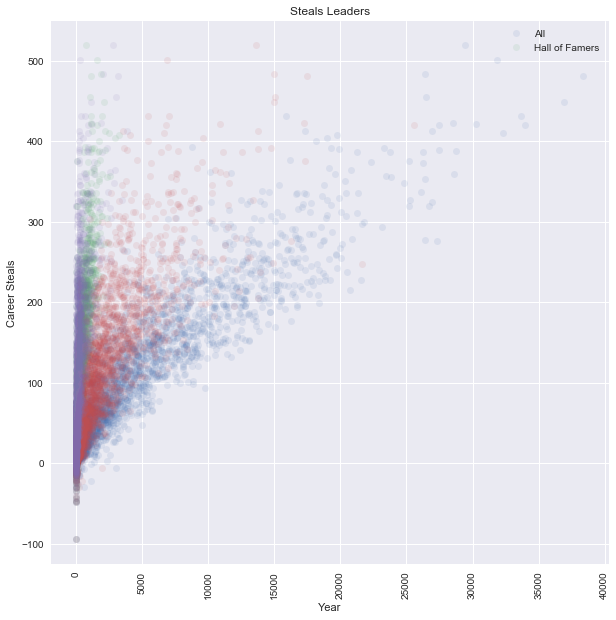

In [274]:
plt.figure(figsize = (10,10))
plt.plot(career['points'],career['PER'],'o', alpha = 0.1)
plt.plot(career['steals'],career['PER'],'o', alpha = 0.1)
plt.plot(career['total_rebounds'],career['PER'],'o', alpha = 0.1)
plt.plot(career['blocks'],career['PER'],'o', alpha = 0.1)
#plt.plot(career['assists'],career['PER'],'o', alpha = 0.1)
plt.legend(['All','Hall of Famers'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Career Steals')
plt.title('Steals Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

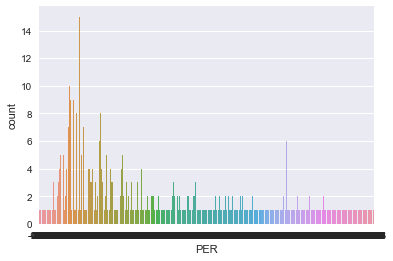

In [313]:
Seasons['PER']

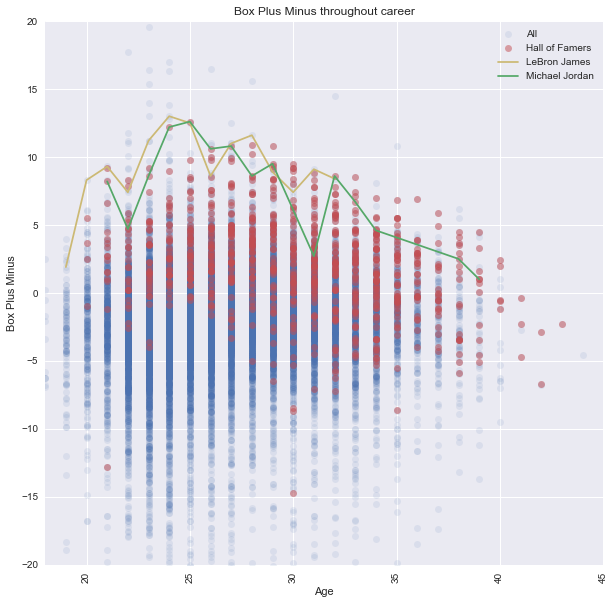

In [327]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Age'],Seasons['BPM'],'o', alpha = 0.1)
plt.plot(Seasons.Age[Seasons.hall_of_fame > 0],Seasons.BPM[Seasons.hall_of_fame > 0],'o', color = 'r', alpha = 0.5)
plt.plot(Seasons.Age[Seasons.Player == 'LeBron James'],Seasons.BPM[Seasons.Player == 'LeBron James'],color='y')
plt.plot(Seasons.Age[Seasons.Player == 'Michael Jordan'],Seasons.BPM[Seasons.Player == 'Michael Jordan'],color='g')
plt.legend(['All','Hall of Famers', 'LeBron James', 'Michael Jordan'], fontsize = 10)
plt.xlabel('Age')
plt.ylabel('Box Plus Minus')
plt.title('Box Plus Minus throughout career')
plt.axis([18, 45, -20, 20])
plt.xticks(rotation='vertical')
plt.show()

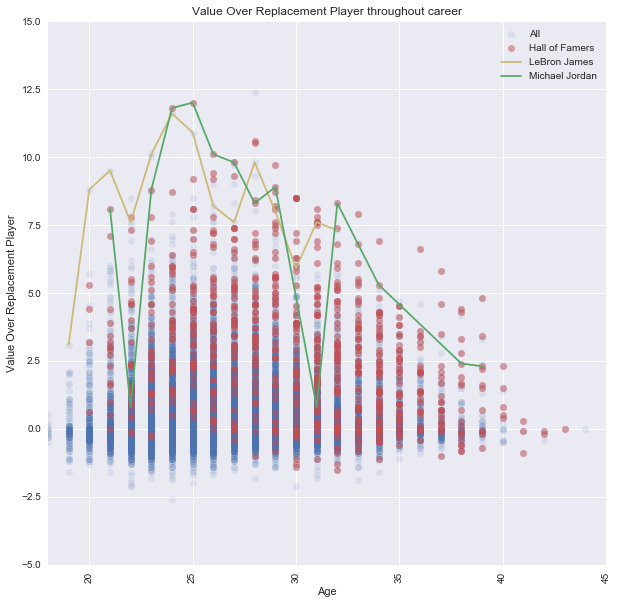

In [337]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Age'],Seasons['VORP'],'o', alpha = 0.1)
plt.plot(Seasons.Age[Seasons.hall_of_fame > 0],Seasons.VORP[Seasons.hall_of_fame > 0],'o', color = 'r', alpha = 0.5)
plt.plot(Seasons.Age[Seasons.Player == 'LeBron James'],Seasons.VORP[Seasons.Player == 'LeBron James'],color='y')
plt.plot(Seasons.Age[Seasons.Player == 'Michael Jordan'],Seasons.VORP[Seasons.Player == 'Michael Jordan'],color='g')
plt.legend(['All','Hall of Famers', 'LeBron James', 'Michael Jordan'], fontsize = 10)
plt.xlabel('Age')
plt.ylabel('Value Over Replacement Player')
plt.title('Value Over Replacement Player throughout career')
plt.axis([18, 45, -5, 15])
plt.xticks(rotation='vertical')
plt.show()

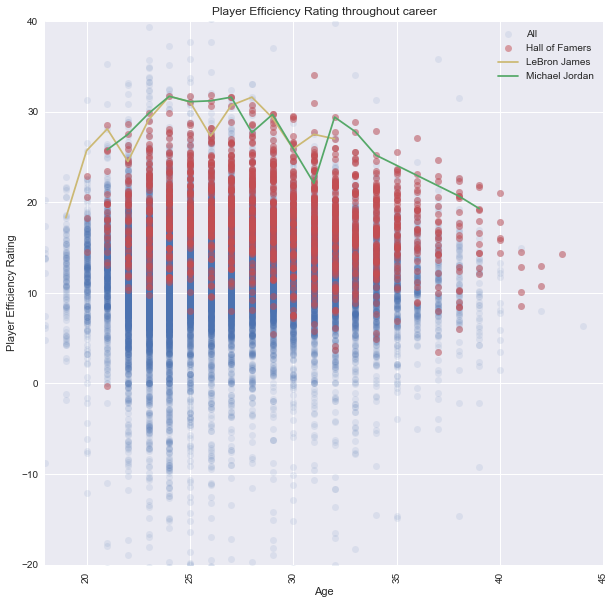

In [342]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Age'],Seasons['PER'],'o', alpha = 0.1)
plt.plot(Seasons.Age[Seasons.hall_of_fame > 0],Seasons.PER[Seasons.hall_of_fame > 0],'o', color = 'r', alpha = 0.5)
plt.plot(Seasons.Age[Seasons.Player == 'LeBron James'],Seasons.PER[Seasons.Player == 'LeBron James'],color='y')
plt.plot(Seasons.Age[Seasons.Player == 'Michael Jordan'],Seasons.PER[Seasons.Player == 'Michael Jordan'],color='g')
plt.legend(['All','Hall of Famers', 'LeBron James', 'Michael Jordan'], fontsize = 10)
plt.xlabel('Age')
plt.ylabel('Player Efficiency Rating')
plt.title('Player Efficiency Rating throughout career')
plt.axis([18, 45, -20, 40])
plt.xticks(rotation='vertical')
plt.show()

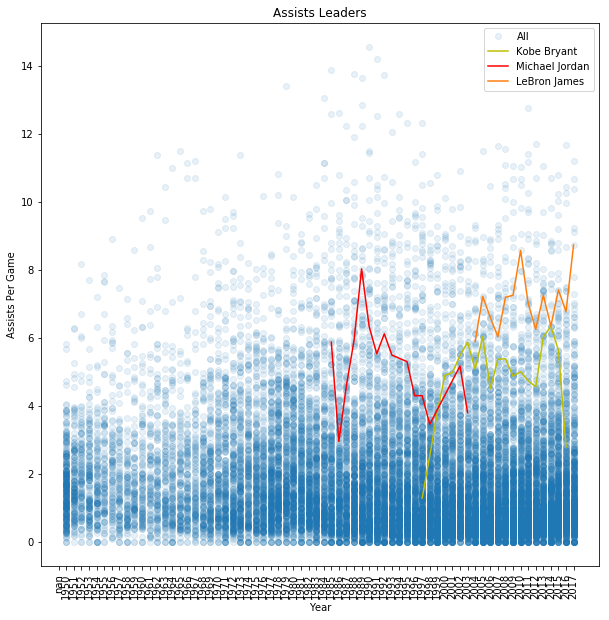

In [63]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Year'],Seasons['apg'],'o', alpha = 0.1)
plt.plot(Seasons.Year[Seasons.Player == 'Kobe Bryant'],Seasons.apg[Seasons.Player == 'Kobe Bryant'], color = 'y')
plt.plot(Seasons.Year[Seasons.Player == 'Michael Jordan'],Seasons.apg[Seasons.Player == 'Michael Jordan'], color = 'r')
plt.plot(Seasons.Year[Seasons.Player == 'LeBron James'],Seasons.apg[Seasons.Player == 'LeBron James'])
plt.legend(['All','Kobe Bryant','Michael Jordan','LeBron James'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Assists Per Game')
plt.title('Assists Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

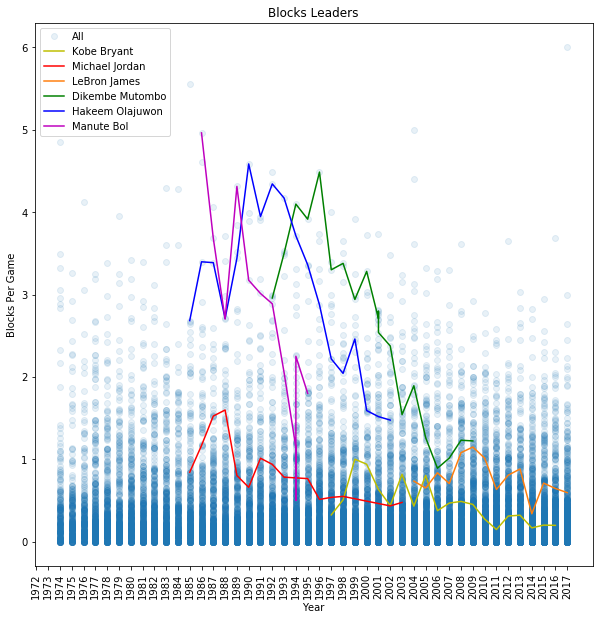

In [64]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Year'],Seasons['bpg'],'o', alpha = 0.1)
plt.plot(Seasons.Year[Seasons.Player == 'Kobe Bryant'],Seasons.bpg[Seasons.Player == 'Kobe Bryant'], color = 'y')
plt.plot(Seasons.Year[Seasons.Player == 'Michael Jordan'],Seasons.bpg[Seasons.Player == 'Michael Jordan'], color = 'r')
plt.plot(Seasons.Year[Seasons.Player == 'LeBron James'],Seasons.bpg[Seasons.Player == 'LeBron James'])
plt.plot(Seasons.Year[Seasons.Player == 'Dikembe Mutombo'],Seasons.bpg[Seasons.Player == 'Dikembe Mutombo'], color = 'g')
plt.plot(Seasons.Year[Seasons.Player == 'Hakeem Olajuwon'],Seasons.bpg[Seasons.Player == 'Hakeem Olajuwon'], color = 'b')
plt.plot(Seasons.Year[Seasons.Player == 'Manute Bol'],Seasons.bpg[Seasons.Player == 'Manute Bol'], color = 'm')
plt.legend(['All','Kobe Bryant','Michael Jordan','LeBron James', 'Dikembe Mutombo', 'Hakeem Olajuwon', 'Manute Bol'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Blocks Per Game')
plt.title('Blocks Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

In [330]:
Seasons.loc[Seasons['win_shares']>20, :]

,Year,Player,position,Age,team,games,games_started,minutes_played,PER,TS%,...,birth_city,birth_state,hall_of_fame,ppg,spg,apg,orpg,drpg,rpg,bpg
172,1950,George Mikan,C,25.0,MNL,68.0,NaN,NaN,NaN,0.487,...,Joliet,Illinois,1,27.426471,NaN,2.897059,NaN,NaN,NaN,NaN
428,1951,George Mikan,C,26.0,MNL,68.0,NaN,NaN,NaN,0.509,...,Joliet,Illinois,1,28.411765,NaN,3.058824,NaN,NaN,14.088235,NaN
1706,1962,Wilt Chamberlain,C,25.0,PHW,80.0,NaN,3882,31.7,0.536,...,Philadelphia,Pennsylvania,1,50.362500,NaN,2.400000,NaN,NaN,25.650000,NaN
1827,1963,Wilt Chamberlain,C,26.0,SFW,80.0,NaN,3806,31.8,0.55,...,Philadelphia,Pennsylvania,1,44.825000,NaN,3.437500,NaN,NaN,24.325000,NaN
1962,1964,Wilt Chamberlain,C,27.0,SFW,80.0,NaN,3689,31.6,0.537,...,Philadelphia,Pennsylvania,1,36.850000,NaN,5.037500,NaN,NaN,22.337500,NaN
2045,1964,Oscar Robertson,PG,25.0,CIN,79.0,NaN,3559,27.6,0.576,...,Charlotte,Tennessee,1,31.392405,NaN,10.987342,NaN,NaN,9.911392,NaN
2239,1966,Wilt Chamberlain,C,29.0,PHI,79.0,NaN,3737,28.3,0.547,...,Philadelphia,Pennsylvania,1,33.531646,NaN,5.240506,NaN,NaN,24.594937,NaN
2366,1967,Wilt Chamberlain,C,30.0,PHI,81.0,NaN,3682,26.5,0.637,...,Philadelphia,Pennsylvania,1,24.148148,NaN,7.777778,NaN,NaN,24.160494,NaN
2507,1968,Wilt Chamberlain,C,31.0,PHI,82.0,NaN,3836,24.7,0.557,...,Philadelphia,Pennsylvania,1,24.292683,NaN,8.560976,NaN,NaN,23.804878,NaN
3070,1971,Kareem Abdul-Jabbar,C,23.0,MIL,82.0,NaN,3288,29.0,0.606,...,New York,New York,1,31.658537,NaN,3.317073,NaN,NaN,15.987805,NaN


In [100]:
#decision tree classification
from sklearn.preprocessing import StandardScaler
features = ['ppg', 'apg', 'rpg', 'bpg', 'spg']
classify_seasons = Seasons
classify_seasons = classify_seasons.fillna(0)
X = classify_seasons[features]
y= classify_seasons["tier"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)


0.90118256925319939

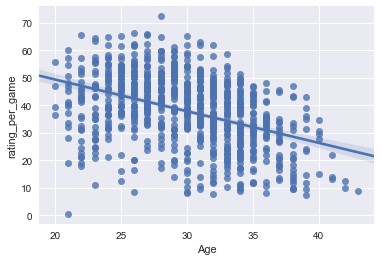

In [82]:
HOF = Seasons[Seasons['hall_of_fame'] == 'y']
sns.regplot(x=HOF["Age"], y=HOF["rating_per_game"])

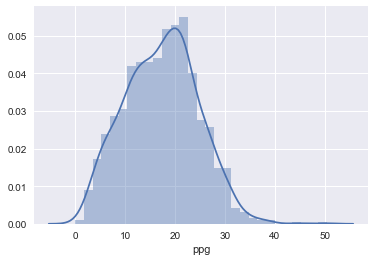

In [111]:
HOF.dropna()
sns.distplot(HOF["ppg"])

In [186]:
#career.loc[career.index == 'Wilt Chamberlain']
sns.distplot(career['assists'])
career.head()

KeyError: "['age' 'rating_per_game'] not in index"

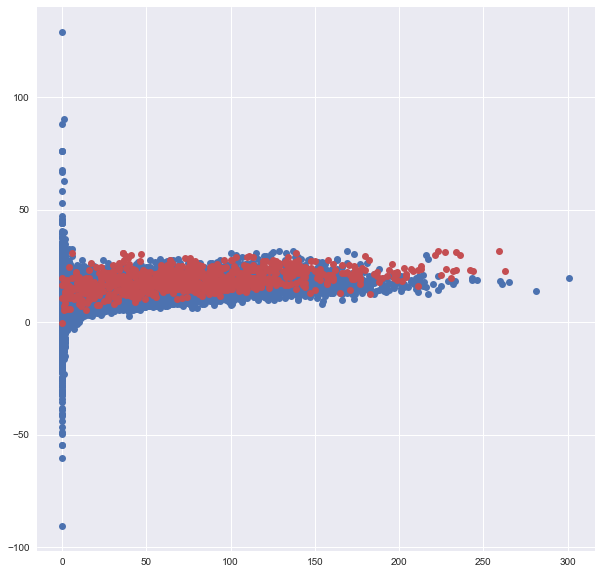

In [166]:
fig = plt.figure(figsize = (10,10))
x = Seasons.steals[(Seasons.hall_of_fame == 'n')]
y = Seasons.PER[(Seasons.hall_of_fame == 'n')]
plt.plot(x, y, 'o', color='b')
x = Seasons.steals[(Seasons.hall_of_fame == 'y')]
y = Seasons.PER[(Seasons.hall_of_fame == 'y')]
plt.plot(x, y, 'o', color='r')


In [76]:
vorp = pd.DataFrame()
vorp['player'] = Seasons.groupby('Player').mean()['VORP'].player
vorp['vorp'] = Seasons.groupby('Player').mean()['VORP'].values
vorp.sort('vorp', ascending = False).head(10)

KeyError: 'VORP'

In [150]:
Seasons[Seasons['Player'] == "Michael Jordan"]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,born,birth_city,birth_state,ppg,spg,apg,orpg,drpg,bpg,hall_of_fame
7716,1985,Michael Jordan,SG,21,CHI,82.0,82,3144,25.8,0.592,...,1963,Brooklyn,New York,28.207317,2.390244,5.865854,2.036585,4.475610,0.841463,y
8094,1986,Michael Jordan,SG,22,CHI,18.0,7,451,27.5,0.533,...,1963,Brooklyn,New York,22.666667,2.055556,2.944444,1.277778,2.277778,1.166667,y
8469,1987,Michael Jordan,SG,23,CHI,82.0,82,3281,29.8,0.562,...,1963,Brooklyn,New York,37.085366,2.878049,4.597561,2.024390,3.219512,1.524390,y
8869,1988,Michael Jordan,SG,24,CHI,82.0,82,3311,31.7,0.603,...,1963,Brooklyn,New York,34.975610,3.158537,5.914634,1.695122,3.780488,1.597561,y
9297,1989,Michael Jordan,SG,25,CHI,81.0,81,3255,31.1,0.614,...,1963,Brooklyn,New York,32.506173,2.888889,8.024691,1.839506,6.209877,0.802469,y
9747,1990,Michael Jordan,SG,26,CHI,82.0,82,3197,31.2,0.606,...,1963,Brooklyn,New York,33.573171,2.768293,6.329268,1.743902,5.146341,0.658537,y
10212,1991,Michael Jordan,SG,27,CHI,82.0,82,3034,31.6,0.605,...,1963,Brooklyn,New York,31.463415,2.719512,5.524390,1.439024,4.560976,1.012195,y
10666,1992,Michael Jordan,SG,28,CHI,80.0,80,3102,27.7,0.579,...,1963,Brooklyn,New York,30.050000,2.275000,6.112500,1.137500,5.250000,0.937500,y
11106,1993,Michael Jordan,SG,29,CHI,78.0,78,3067,29.7,0.564,...,1963,Brooklyn,New York,32.576923,2.833333,5.487179,1.730769,4.961538,0.782051,y
12048,1995,Michael Jordan,SG,31,CHI,17.0,17,668,22.1,0.493,...,1963,Brooklyn,New York,26.882353,1.764706,5.294118,1.470588,5.411765,0.764706,y


In [ ]:
fig = plt.figure(figsize = (10,10))
x = players.weight[(players.pos == 'PG')]
y = players.height[(players.pos == 'PG')]
plt.plot(x, y, 'o', color='r')
x = players.weight[(players.pos == 'SG')]
y = players.height[(players.pos == 'SG')]
plt.plot(x, y, 'o', color='b')
x = players.weight[(players.pos == 'SF')]
y = players.height[(players.pos == 'SF')]
plt.plot(x, y, 'o', color='m')
x = players.weight[(players.pos == 'PF')]
y = players.height[(players.pos == 'PF')]
plt.plot(x, y, 'o', color='g')
x = players.weight[(players.pos == 'C')]
y = players.height[(players.pos == 'C')]
plt.plot(x, y, 'o', color='y')
plt.xlabel('Weight(lbs)')
plt.ylabel('Height(ft)')
plt.title('Positional Size')
plt.legend(['PG','SG','SF','PF','C'], loc = 1)
plt.show()